# Download .swc data and perform basic calculations

Use allensdk.api to get swc data and perform calculations

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import pandas as pd 
import numpy as np
import pprint
from pandas.io.json import json_normalize
from bson import ObjectId
import json
import seaborn as sns
from pymongo import MongoClient
import os
# connect to the locally hosted MongoDB instance
client = MongoClient('mongodb://localhost:27017/')
import os

In [77]:
import matplotlib.pyplot as plt 

In [10]:
from allensdk.core.cell_types_cache import CellTypesCache, ReporterStatus as RS
from allensdk.api.queries.cell_types_api import CellTypesApi

In [11]:
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

In [12]:
ct = CellTypesApi()
# # a list of dictionaries containing metadata for cells with reconstructions
cells = ct.list_cells(require_reconstruction=True)

# a list of cell metadata for cells with reconstructions, download if necessary
# cells = ctc.get_cells(require_reconstruction=True)

In [13]:
print("number of cells:",len(cells))

('number of cells:', 402)


In [15]:
# download .swc and marker files
for a in cells: 
    ct.save_reconstruction(a['id'], file_name='allen_morpho/ai'+str(a['id'])+'.swc')
    ct.save_reconstruction_markers(a['id'],file_name='allen_morpho/ai'+str(a['id'])+'_marker.swc')

2018-02-13 22:47:15,278 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/569861719
2018-02-13 22:47:16,018 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/569861813
2018-02-13 22:47:16,181 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491392947
2018-02-13 22:47:16,474 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496607479
2018-02-13 22:47:16,639 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496001052
2018-02-13 22:47:16,904 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496605366
2018-02-13 22:47:17,073 allensdk.api.api.retrieve_fi

2018-02-13 22:47:28,549 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491458277
2018-02-13 22:47:29,009 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/501281201
2018-02-13 22:47:29,117 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543107198
2018-02-13 22:47:29,268 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543107326
2018-02-13 22:47:29,378 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/601947717
2018-02-13 22:47:29,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/601947720
2018-02-13 22:47:29,702 allensdk.api.api.retrieve_fi

2018-02-13 22:47:39,589 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496001074
2018-02-13 22:47:39,783 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496604406
2018-02-13 22:47:39,905 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491770936
2018-02-13 22:47:40,085 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496607775
2018-02-13 22:47:40,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/537047527
2018-02-13 22:47:40,407 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/537047569
2018-02-13 22:47:40,532 allensdk.api.api.retrieve_fi

2018-02-13 22:47:48,530 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/606347941
2018-02-13 22:47:48,829 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/606347944
2018-02-13 22:47:48,956 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491771277
2018-02-13 22:47:49,136 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496606873
2018-02-13 22:47:49,297 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491771126
2018-02-13 22:47:49,568 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496606781
2018-02-13 22:47:49,960 allensdk.api.api.retrieve_fi

2018-02-13 22:47:58,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/492100859
2018-02-13 22:47:59,070 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/501281277
2018-02-13 22:47:59,207 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514351603
2018-02-13 22:47:59,378 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514351682
2018-02-13 22:47:59,515 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/605871880
2018-02-13 22:48:00,314 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/605871884
2018-02-13 22:48:00,437 allensdk.api.api.retrieve_fi

2018-02-13 22:48:08,378 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496085262
2018-02-13 22:48:08,554 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496605307
2018-02-13 22:48:08,672 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496164025
2018-02-13 22:48:08,839 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496606086
2018-02-13 22:48:09,010 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491120168
2018-02-13 22:48:09,194 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/497615365
2018-02-13 22:48:09,314 allensdk.api.api.retrieve_fi

2018-02-13 22:48:17,225 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/500961549
2018-02-13 22:48:17,415 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/500961557
2018-02-13 22:48:17,552 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491119973
2018-02-13 22:48:17,720 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/497615407
2018-02-13 22:48:17,865 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/606347922
2018-02-13 22:48:18,196 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/606347925
2018-02-13 22:48:18,347 allensdk.api.api.retrieve_fi

2018-02-13 22:48:28,287 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/495335482
2018-02-13 22:48:28,487 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/501275508
2018-02-13 22:48:28,609 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/599474746
2018-02-13 22:48:29,525 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/599474749
2018-02-13 22:48:29,647 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543141065
2018-02-13 22:48:29,855 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543141073
2018-02-13 22:48:30,029 allensdk.api.api.retrieve_fi

2018-02-13 22:48:38,258 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/559391891
2018-02-13 22:48:38,481 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/559391957
2018-02-13 22:48:38,616 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/510121195
2018-02-13 22:48:39,112 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/510121300
2018-02-13 22:48:39,298 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/539990524
2018-02-13 22:48:39,571 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/539990656
2018-02-13 22:48:39,704 allensdk.api.api.retrieve_fi

2018-02-13 22:48:48,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491771448
2018-02-13 22:48:48,255 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496606365
2018-02-13 22:48:48,363 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543103341
2018-02-13 22:48:48,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543103430
2018-02-13 22:48:48,805 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328392
2018-02-13 22:48:49,393 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/512328402
2018-02-13 22:48:49,533 allensdk.api.api.retrieve_fi

2018-02-13 22:48:59,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/580259879
2018-02-13 22:49:00,038 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/580259967
2018-02-13 22:49:00,182 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491253804
2018-02-13 22:49:00,358 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496607157
2018-02-13 22:49:00,506 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491770712
2018-02-13 22:49:00,685 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496607735
2018-02-13 22:49:00,862 allensdk.api.api.retrieve_fi

2018-02-13 22:49:09,586 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/519262719
2018-02-13 22:49:09,788 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/519262830
2018-02-13 22:49:09,927 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/513557095
2018-02-13 22:49:10,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/513557167
2018-02-13 22:49:10,613 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/495337163
2018-02-13 22:49:10,771 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/497615003
2018-02-13 22:49:10,882 allensdk.api.api.retrieve_fi

2018-02-13 22:49:20,762 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/492100685
2018-02-13 22:49:20,911 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496603851
2018-02-13 22:49:21,039 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491120146
2018-02-13 22:49:21,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496606421
2018-02-13 22:49:21,329 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/537047497
2018-02-13 22:49:21,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/537047506
2018-02-13 22:49:21,651 allensdk.api.api.retrieve_fi

2018-02-13 22:49:30,738 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/549378279
2018-02-13 22:49:31,031 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/549378287
2018-02-13 22:49:31,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/566350720
2018-02-13 22:49:32,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/566350793
2018-02-13 22:49:32,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543140957
2018-02-13 22:49:32,501 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543140971
2018-02-13 22:49:32,681 allensdk.api.api.retrieve_fi

2018-02-13 22:49:41,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491458977
2018-02-13 22:49:41,321 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496607062
2018-02-13 22:49:41,551 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543101966
2018-02-13 22:49:41,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/543102070
2018-02-13 22:49:41,934 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514342402
2018-02-13 22:49:42,225 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514342410
2018-02-13 22:49:42,358 allensdk.api.api.retrieve_fi

2018-02-13 22:49:50,866 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/492100962
2018-02-13 22:49:51,051 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/497615137
2018-02-13 22:49:51,158 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491770170
2018-02-13 22:49:51,355 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496607646
2018-02-13 22:49:51,552 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/505203907
2018-02-13 22:49:51,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/505203916
2018-02-13 22:49:51,842 allensdk.api.api.retrieve_fi

In [2]:
import analyze_swcfile

In [10]:
example_swc = 'allen_morpho/ai313861608.swc'

In [12]:
analyze_swcfile.preview_file(example_swc)

First 10 lines of `allen_morpho/ai313861608.swc`:

	# generated by Vaa3D Plugin sort_neuron_swc

	# source file(s): C:/Users/alexh/Desktop/Check then delete/Pvalb-IRES-Cre_Ai14_IVSCC_-165874.04.02.01_464113242_p.swc_Z_T10.swc

	# id,type,x,y,z,r,pid

	1 1 396.0425 368.9697 26.6608 6.4254 -1

	2 3 396.0025 362.3471 29.622 0.2924 1

	3 3 396.094 361.2214 30.581 0.4068 2

	4 3 396.3068 360.1015 31.2682 0.4703 3

	5 3 396.2553 358.9609 31.7615 0.5084 4

	6 3 396.0677 357.8409 32.0026 0.5339 5

	7 3 396.0528 356.6981 32.0524 0.5466 6



In [13]:
example_df = analyze_swcfile.load_to_dataframe(example_swc,skiprows=3)

In [14]:
example_df.head()

,index,type,x_coord,y_coord,z_coord,radius,parent
0,0,1,396.0425,368.9697,26.6608,6.4254,-1
1,1,3,396.0025,362.3471,29.6220,0.2924,0
2,2,3,396.0940,361.2214,30.5810,0.4068,1
3,3,3,396.3068,360.1015,31.2682,0.4703,2
4,4,3,396.2553,358.9609,31.7615,0.5084,3


In [15]:
#example_df.set_index('index').head()

In [16]:
child_list = analyze_swcfile.get_child_list(example_df)

In [20]:
termini = analyze_swcfile.get_termini(example_df)

In [22]:
branches = analyze_swcfile.get_branches(example_df)

In [24]:
analyze_swcfile.get_path_to_root(1036,[1036],example_df)

[1036,
 1035.0,
 1034.0,
 1033.0,
 1032.0,
 1031.0,
 1030.0,
 1029.0,
 1028.0,
 1027.0,
 1026.0,
 1025.0,
 1024.0,
 1023.0,
 1022.0,
 1021.0,
 1020.0,
 1019.0,
 1018.0,
 1017.0,
 1016.0,
 1015.0,
 1001.0,
 1000.0,
 999.0,
 998.0,
 997.0,
 996.0,
 995.0,
 994.0,
 993.0,
 992.0,
 991.0,
 990.0,
 989.0,
 988.0,
 987.0,
 986.0,
 985.0,
 984.0,
 983.0,
 982.0,
 0.0]

In [33]:
analyze_swcfile.get_dist_to_root(3,example_df)

[3 2 1 0]


10.067286615508252

In [75]:
# path length for each branch point
branch_dist = [analyze_swcfile.get_dist_to_root(a,example_df) for a in branches]

In [85]:
branch_r = [example_df.loc[int(a),'radius'] for a in branches]

In [87]:
branch_r2 = [example_df.loc[int(a),'radius']**2 for a in branches]

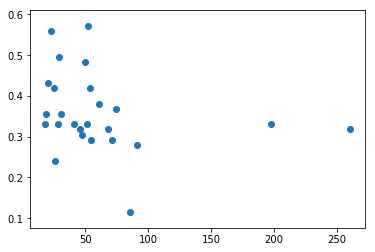

In [92]:
#branch point path length vs radius
plt.scatter(branch_dist[1:],branch_r[1:])

## Morphology visualization using neurom

In [36]:
import neurom as nm

In [44]:
from neurom import viewer

In [64]:
nrn = nm.load_neuron(example_swc)

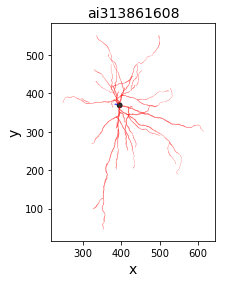

In [71]:
%matplotlib inline
fig, ax =viewer.draw(nrn) 

<IPython.core.display.Javascript object>


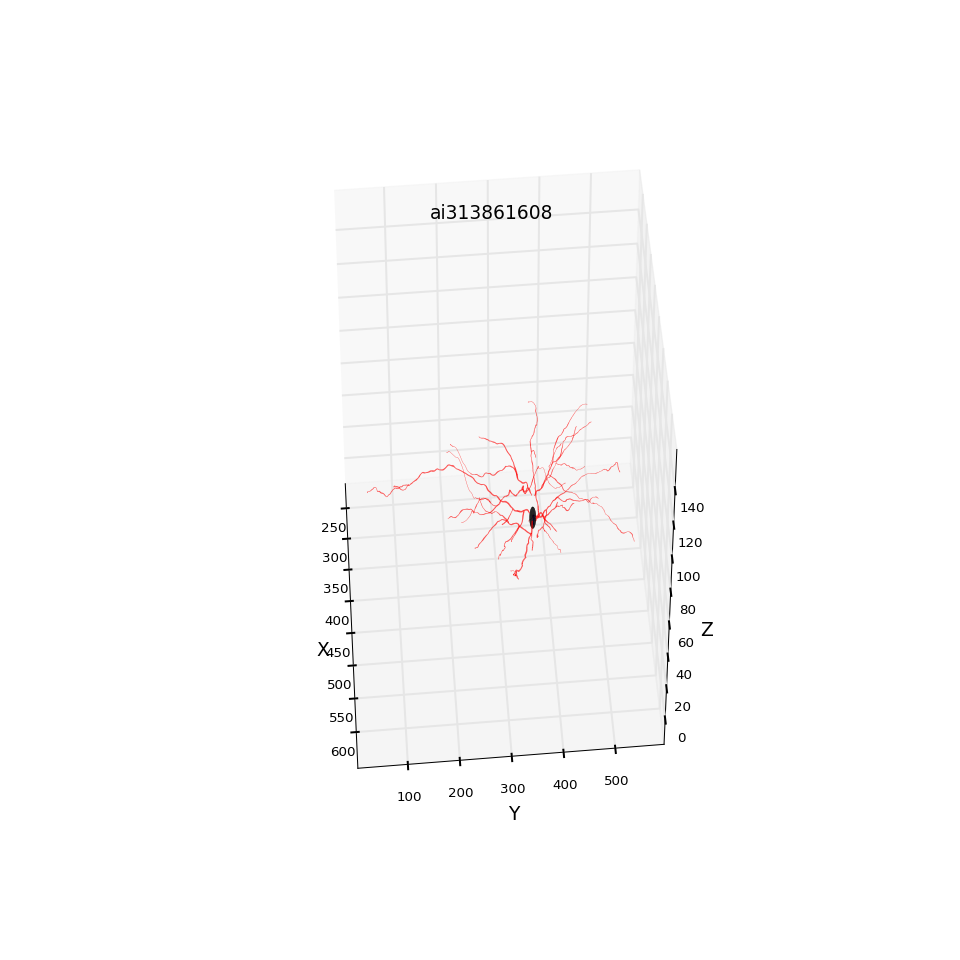

In [67]:
%matplotlib notebook 
fig, ax = viewer.draw(nrn, mode='3d')
ax.set_autoscale_on(True)
fig.set_size_inches(10,10)